# Import essential packages

In [30]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import export_graphviz
import graphviz


In [31]:
# read csv dataset
df = pd.read_csv('cardio_train.csv',delimiter=";")

df

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[70000 rows x 13 columns]

# Exploratory Data Analysis

In [32]:
# Check for missing values
print(df.isna().sum())

# Check for duplicate IDs
duplicate_ids = df[df.duplicated(subset='id', keep=False)]

# Print the number of duplicate IDs found
print(f"Number of duplicate IDs: {len(duplicate_ids)}")

# Check the data types and basic statistics
print(df.info())
print(df.describe())


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64
Number of duplicate IDs: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  


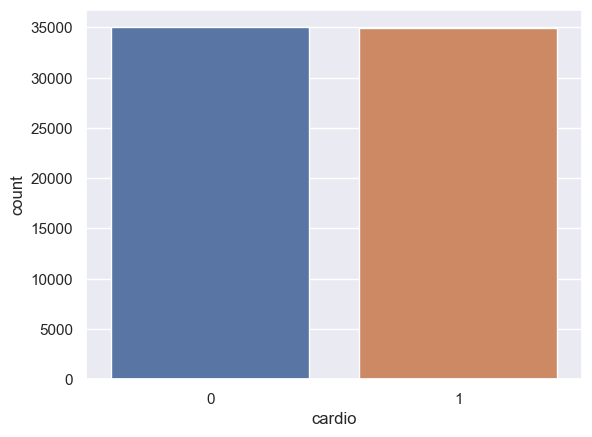

In [33]:

# Visualize the distribution of the target variable
sb.countplot(x='cardio', data=df)
plt.show()


In [34]:
# Compute the correlation matrix
corr = df.corr()

# Create a heatmap using Plotly
fig = px.imshow(corr.values,
                x=corr.columns,
                y=corr.index,
                color_continuous_scale='RdBu',
                zmin=-1,
                zmax=1,
                title='Correlation Heatmap',
                labels=dict(x='Variable 1', y='Variable 2', color='Correlation'))

# Add annotations to the heatmap
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        fig.add_annotation(x=corr.columns[i], y=corr.index[j],
                           text=str(round(corr.iloc[j, i], 2)),
                           showarrow=False, font=dict(size=14))

# Configure the layout of the heatmap
fig.update_layout(width=800, height=800, title_x=0.5)
# Display the heatmap
fig.show()


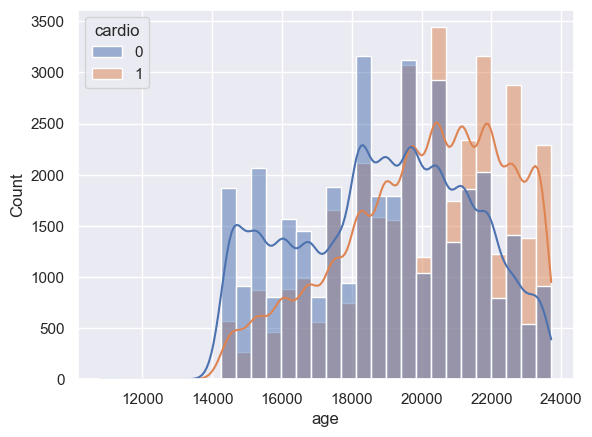

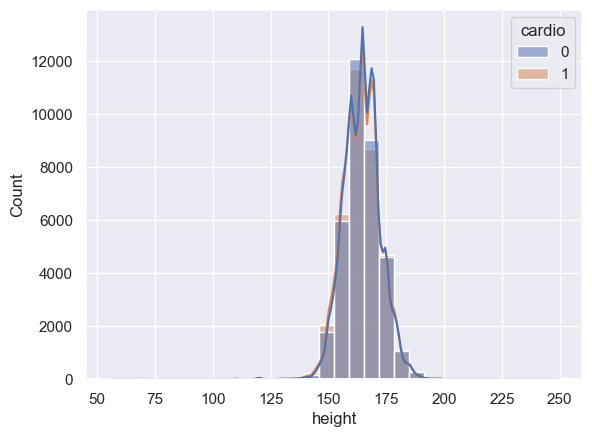

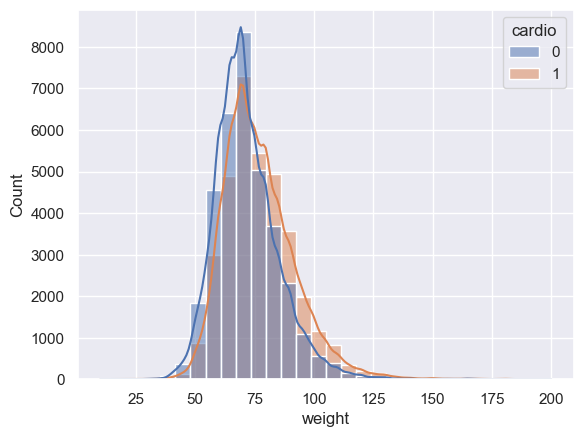

In [35]:
# Visualize the distribution of numerical features
sb.histplot(data=df, x="age", hue="cardio", kde=True, bins=30)
plt.show()
sb.histplot(data=df, x="height", hue="cardio", kde=True, bins=30)
plt.show()
sb.histplot(data=df, x="weight", hue="cardio", kde=True, bins=30)
plt.show()


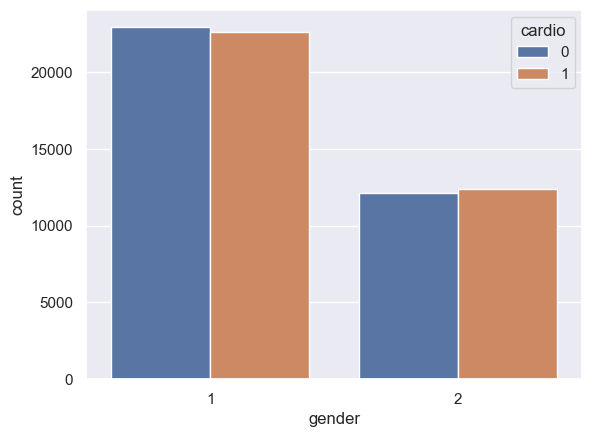

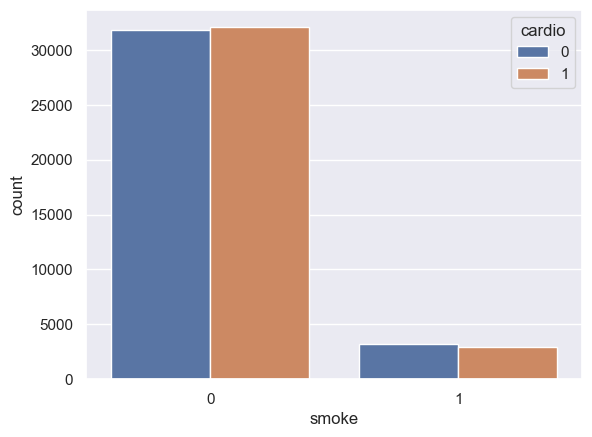

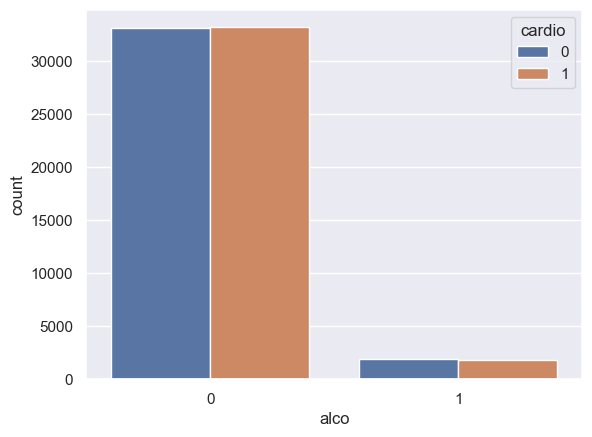

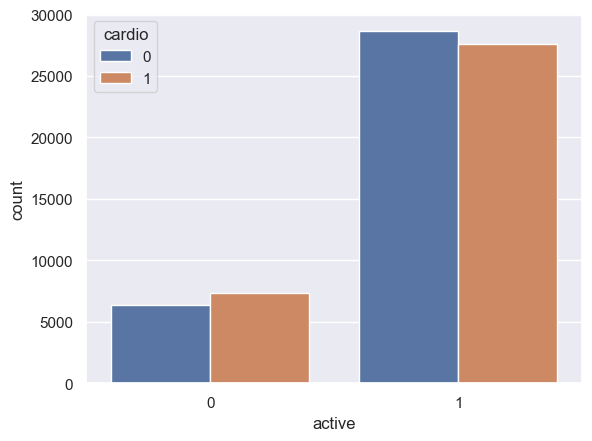

In [36]:
# Visualize the distribution of categorical features
sb.countplot(x='gender', hue='cardio', data=df)
plt.show()
sb.countplot(x='smoke', hue='cardio', data=df)
plt.show()
sb.countplot(x='alco', hue='cardio', data=df)
plt.show()
sb.countplot(x='active', hue='cardio', data=df)
plt.show()


<AxesSubplot:>

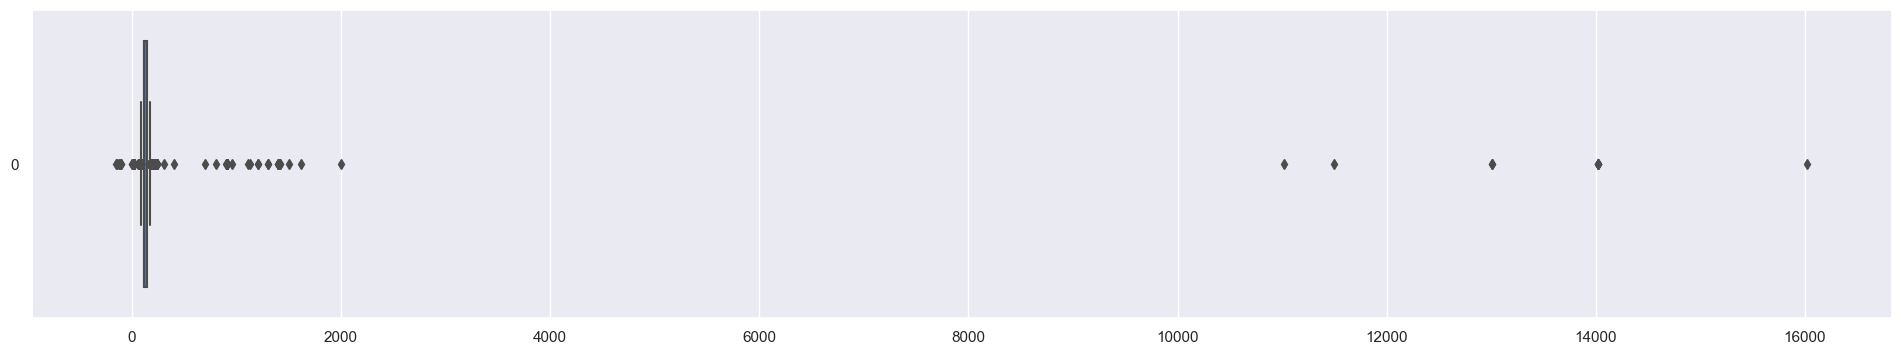

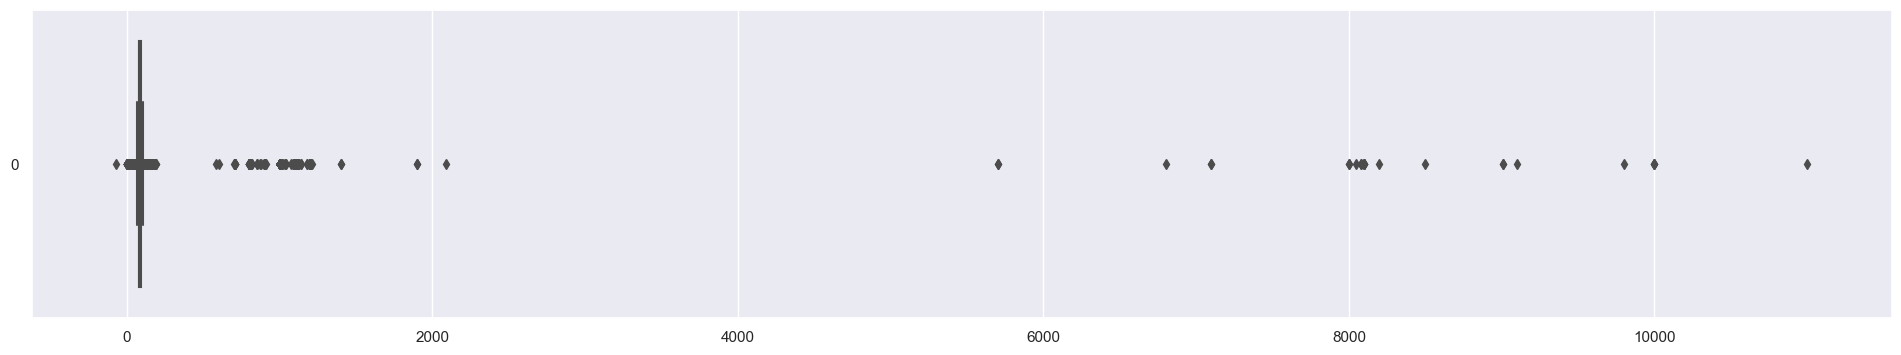

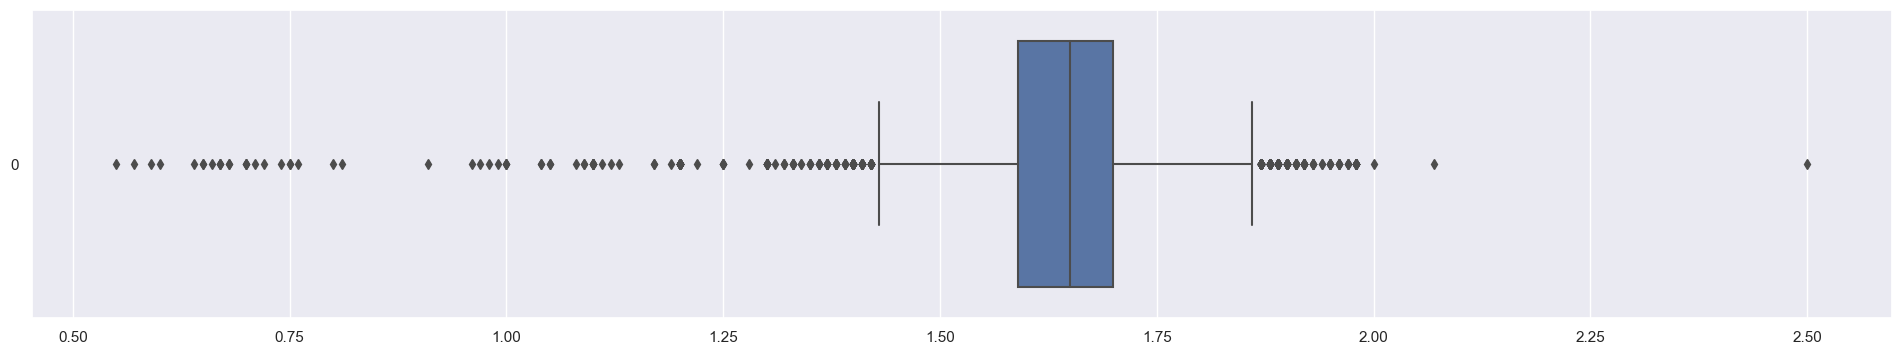

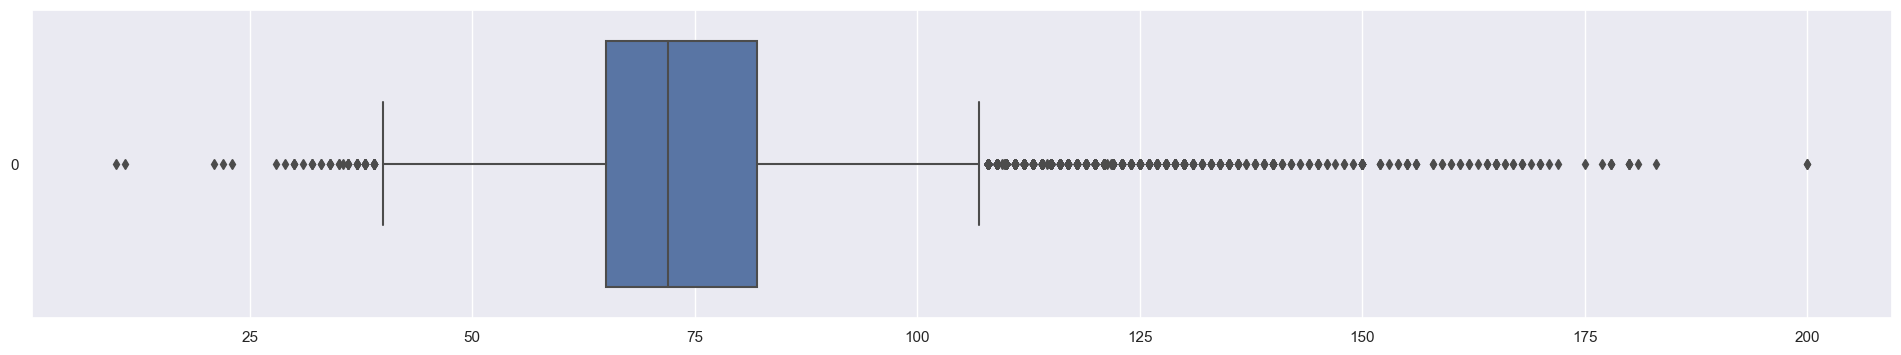

In [37]:
#Boxplots of blood pressure, height and weight
ap_hi = df['ap_hi'] 
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = ap_hi, orient = "h")

ap_lo= df['ap_lo'] 
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = ap_lo, orient = "h")

height = df['height']/100 
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = height, orient = "h")

weight = df['weight']
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = weight, orient = "h")

# Cleaning the data and adding BMI(Data wrangling)

In [38]:

# Clean the data
df = df.drop_duplicates() # remove duplicates
df = df.dropna() # remove missing values
df = pd.get_dummies(df, columns=['gender'], drop_first=True) # convert gender to binary
df['age'] = (df['age'] / 365).astype(int) # Convert age to years
df['smoke'] = df['smoke'].astype(bool) # Convert smoke to boolean
df['alco'] = df['alco'].astype(bool) # Convert alco to boolean
df['active'] = df['active'].astype(bool) # Convert active to boolean

#add bmi
df['bmi'] = round(df['weight']/(df['height']/100)**2, 2)


#changing column names
df.rename(columns={'ap_hi': 'hi_bp', 'ap_lo': 'low_bp'}, inplace=True)



In [39]:

# remove outliers for 'height'
height_quantiles = df['height'].quantile([0.025, 0.975])
df['height'] = df['height'].clip(height_quantiles[0.025], height_quantiles[0.975])

# remove outliers for 'weight'
weight_quantiles = df['weight'].quantile([0.025, 0.975])
df['weight'] = df['weight'].clip(weight_quantiles[0.025], weight_quantiles[0.975])


# remove outliers for 'hi_bp'
ap_hi_quantiles = df['hi_bp'].quantile([0.025, 0.975])
df['hi_bp'] = df['hi_bp'].clip(ap_hi_quantiles[0.025], ap_hi_quantiles[0.975])

# remove outliers for 'low_bp'
ap_lo_quantiles = df['low_bp'].quantile([0.025, 0.975])
df['low_bp'] = df['low_bp'].clip(ap_lo_quantiles[0.025], ap_lo_quantiles[0.975])
# Remove records where diastolic pressure is higher than systolic
bp_mask = (df['low_bp'] <= df['hi_bp'])
df = df.loc[bp_mask]

In [40]:
# Create a DataFrame with 'ap_lo' and 'ap_hi' columns
blood_pressure = df[['low_bp', 'hi_bp']]

# Melt the DataFrame to create a 'variable' and 'value' column
blood_pressure = blood_pressure.melt(var_name='variable', value_name='value')

# Create a box plot using Plotly
fig = px.box(blood_pressure, x='variable', y='value', color='variable', title='Blood Pressure')
fig.show()

# Print the number of cases where diastolic pressure is higher than systolic pressure
num_cases = df[df['low_bp'] > df['hi_bp']].shape[0]
print("Diastolic pressure is higher than systolic one in {0} cases".format(num_cases))


Diastolic pressure is higher than systolic one in 0 cases


In [41]:
# Compute the correlation matrix
corr = df.corr()

# Create a heatmap using Plotly
fig = px.imshow(corr.values,
                x=corr.columns,
                y=corr.index,
                color_continuous_scale='RdBu',
                zmin=-1,
                zmax=1,
                title='Correlation Heatmap',
                labels=dict(x='Variable 1', y='Variable 2', color='Correlation'))

# Add annotations to the heatmap
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        fig.add_annotation(x=corr.columns[i], y=corr.index[j],
                           text=str(round(corr.iloc[j, i], 2)),
                           showarrow=False, font=dict(size=14))

# Configure the layout of the heatmap
fig.update_layout(width=800, height=800, title_x=0.5)
# Display the heatmap
fig.show()

# Upsample minority gender

In [42]:
#Number of female and male patients, 0 = female, 1 = male
print(df['gender_2'].value_counts())


0    45530
1    24470
Name: gender_2, dtype: int64


In [43]:
# # Upsample the minority gender (as there are more female patients than male patients)
female_df = df[df['gender_2']==0]
male_df = df[df['gender_2']==1]
male_df_upsampled = resample(male_df, replace=True, n_samples=len(female_df), random_state=42)
df = pd.concat([female_df, male_df_upsampled])

In [44]:
#Number of female and male patients after upsampling the minority, 0 = female, 1 = male

print(df['gender_2'].value_counts())


0    45530
1    45530
Name: gender_2, dtype: int64


# Logreg for all features

Logistic regression:
Accuracy: 0.7228750274544257
age: 0.048
height: -0.004
weight: 0.014
hi_bp: 0.055
low_bp: 0.018
cholesterol: 0.503
gluc: -0.133
smoke: -0.209
alco: -0.138
active: -0.234
gender_2: -0.015
bmi: -0.001


<AxesSubplot:>

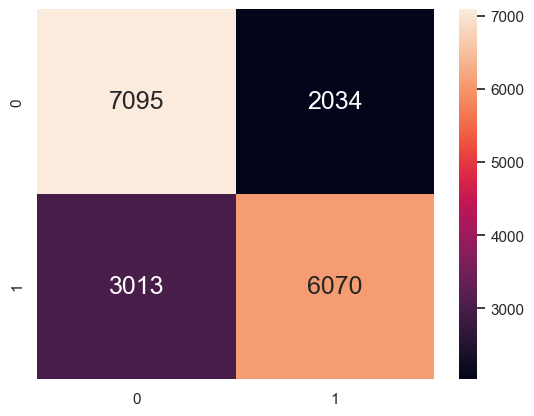

In [45]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['id', 'cardio'], axis=1), df['cardio'], test_size=0.2, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the testing set
y_pred = logreg.predict(X_test)


# Logistic regression
print("Logistic regression:")
print("Accuracy:", accuracy_score(y_test, y_pred))



# Extract feature importance
importance = logreg.coef_[0]

# Print feature importance
for feature, val in list(zip(X_train.columns, importance)):
    print(f'{feature}: {val:.3f}')
    
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})






    
    

# Decision tree for all features

Decision tree classifier:
Accuracy: 0.7243026575884033
Precision: 0.7234323432343235
Recall: 0.7239898711879335
F1 Score: 0.72371099983492
Feature importances (sorted):
height: 0.0
weight: 0.0
smoke: 0.0
alco: 0.0
active: 0.0
gender_2: 0.0
bmi: 0.002764482844814398
low_bp: 0.0058059214048075776
gluc: 0.005819965615135526
cholesterol: 0.0760271607420093
age: 0.11022099665581045
hi_bp: 0.7993614727374228


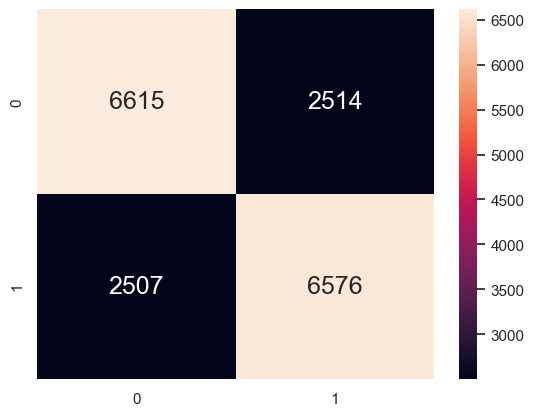

In [46]:
# Split the dataset into training and testing sets
X = df.drop(['cardio', 'id'], axis=1)
y = df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier and fit it to the training data
clf = DecisionTreeClassifier(random_state=42,max_depth=4)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
print("Decision tree classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))


sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Sort the feature importances in ascending order
sorted_importances = sorted(zip(X.columns, clf.feature_importances_), key=lambda x: x[1])

# Print the sorted feature importances
print("Feature importances (sorted):")
for feature, importance in sorted_importances:
    print("{}: {}".format(feature, importance))




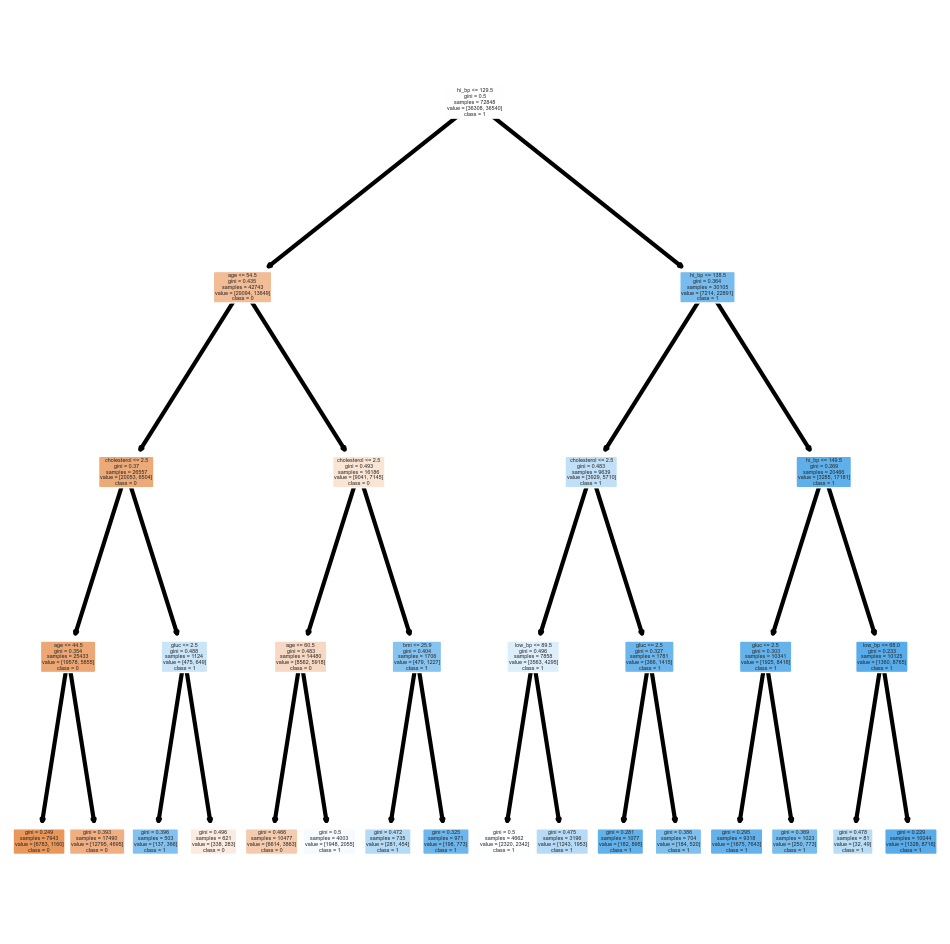

In [47]:

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(clf, 
          feature_names = X.columns,
          class_names = ['0','1'],
          filled=True, rounded=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

# Decision Tree classifier for numerical data

Decision tree classifier:
Accuracy: 0.72210630353613
Precision: 0.7174524221453287
Recall: 0.7304855224044919
F1 Score: 0.723910315858382
Feature importances (sorted):
height: 0.0
weight: 0.0023751177106684173
bmi: 0.002771798710988666
low_bp: 0.0058212860666269
cholesterol: 0.07622835733638912
age: 0.11132655494027086
hi_bp: 0.801476885235056


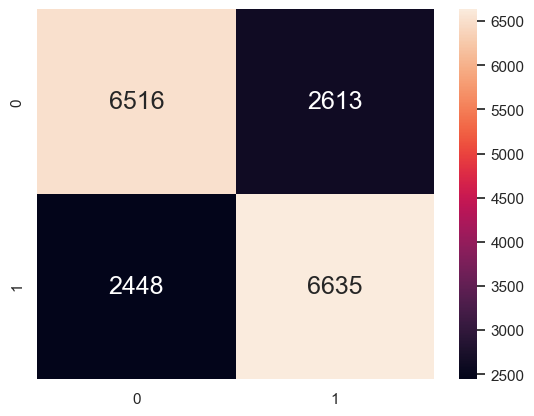

In [48]:
# Split the dataset into training and testing sets
num_features = ['age', 'height', 'weight', 'hi_bp', 'low_bp', 'cholesterol', 'bmi']
X = df[num_features]
y = df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier and fit it to the training data
clf = DecisionTreeClassifier(random_state=42, max_depth=4)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
print("Decision tree classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))


sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Sort the feature importances in ascending order
sorted_importances = sorted(zip(X.columns, clf.feature_importances_), key=lambda x: x[1])

# Print the sorted feature importances
print("Feature importances (sorted):")
for feature, importance in sorted_importances:
    print("{}: {}".format(feature, importance))




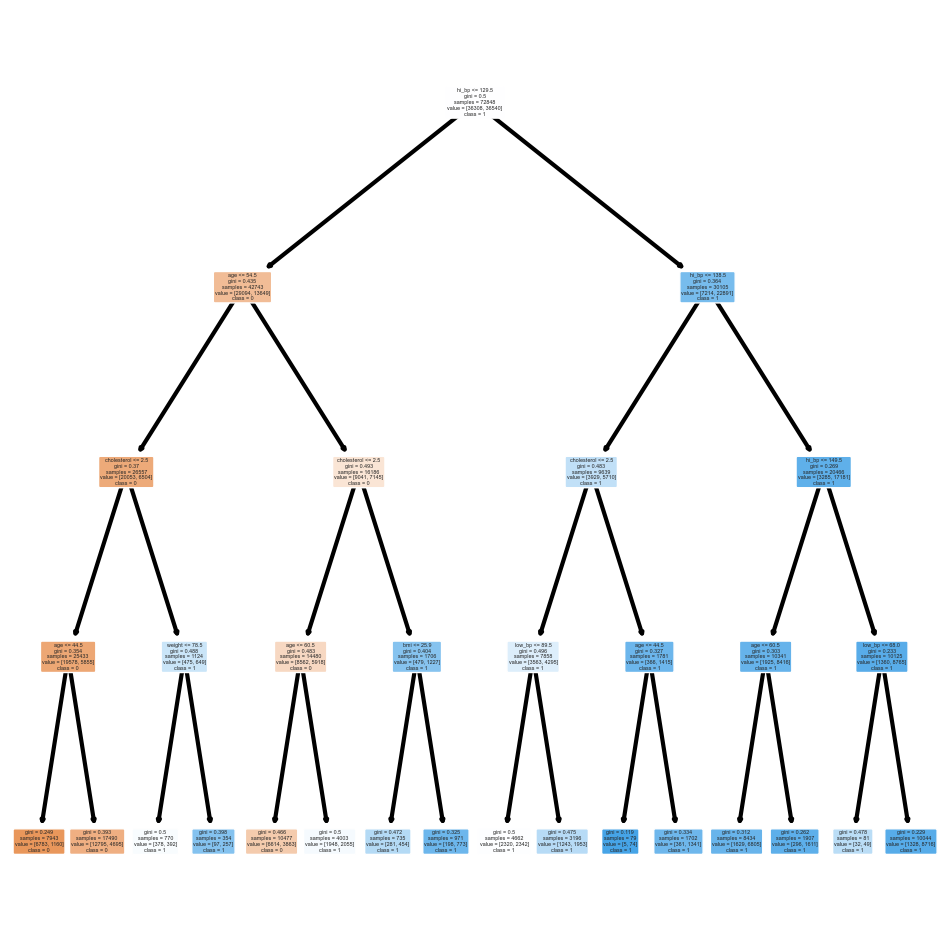

In [49]:

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(clf, 
          feature_names = X.columns,
          class_names = ['0','1'],
          filled=True, rounded=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

# Random Forest using numerical features

Accuracy: 0.7972765209751812
Precision: 0.8000667928309028
Recall: 0.791258394803479
F1 Score: 0.7956382154323038
Feature importances:
age: 0.11132655494027086
height: 0.0
weight: 0.0023751177106684173
hi_bp: 0.801476885235056
low_bp: 0.0058212860666269
cholesterol: 0.07622835733638912
bmi: 0.002771798710988666


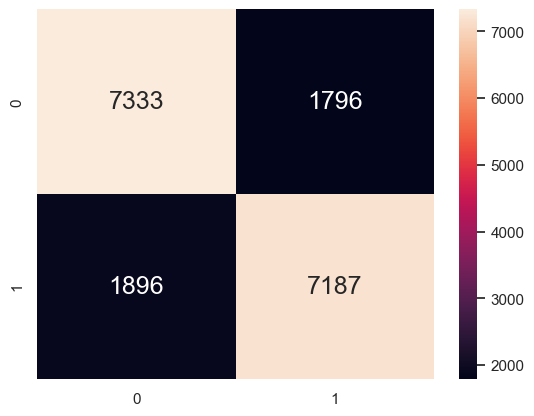

In [50]:
num_features = ['age', 'height', 'weight', 'hi_bp', 'low_bp', 'cholesterol', 'bmi']

X = df[num_features]
y = df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
# Print the feature importances
print("Feature importances:")
for feature, importance in zip(X.columns, clf.feature_importances_):
    print("{}: {}".format(feature, importance))
    
    

# Random forest using best features

Accuracy: 0.7727322644410279
Precision: 0.7772543741588156
Recall: 0.7629637784872839
F1 Score: 0.7700427801544529
Best Features:
hi_bp     0.263378
bmi       0.237678
age       0.223206
weight    0.141965
height    0.133774
dtype: float64


<AxesSubplot:>

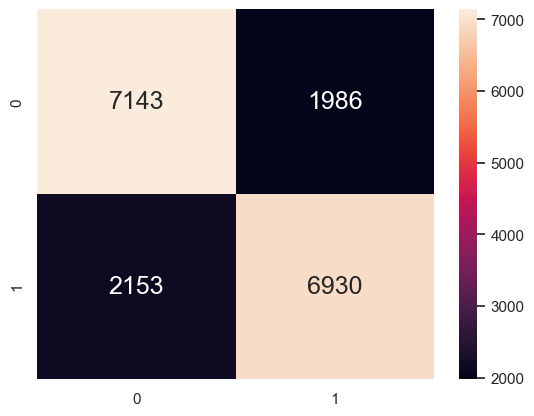

In [51]:
X = df.drop(['cardio', 'id'], axis=1)
y = df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# Select the best features using one of the feature selection techniques
# For example, using feature importance:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
best_features = importances.nlargest(5).index.tolist()

# Train a random forest classifier using the best features
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train[best_features], y_train)

# Evaluate the performance of the model on the testing set
y_pred = rf.predict(X_test[best_features])
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Print the feature importance scores
print("Best Features:")
importances = pd.Series(rf.feature_importances_, index=best_features)
importances_sorted = importances.sort_values(ascending=False)
print(importances_sorted)


sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

